In [1]:
#importing the dependencies
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
#loading the dataset
creditcard_data = pd.read_csv('creditcard.csv')

In [3]:
#first 5 rows
creditcard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#last 5 rows
creditcard_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
#information of dataset
creditcard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#checking the missing values
creditcard_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
#count of valid and fraud transactions where 1 = valid and 0 = fraud
creditcard_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
# As the dataset is highly unbalanced hence differentiating the data
valid=creditcard_data[creditcard_data.Class == 0]
fraud=creditcard_data[creditcard_data.Class == 1]

In [9]:
print(valid.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [10]:
#Descriptive Statistics for valid Transcation

valid.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
#Descriptive Statistics for fraud Transcation
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


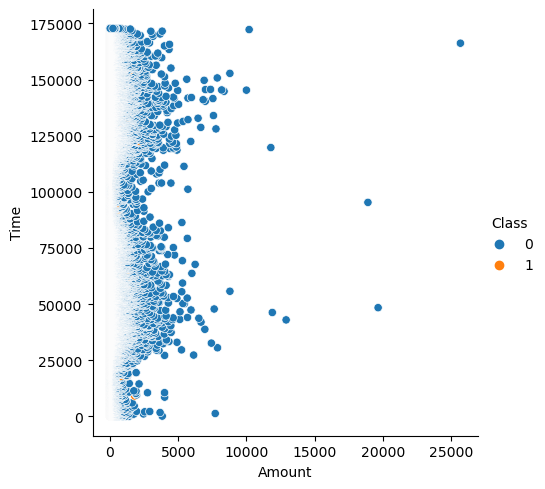

In [12]:
#Visualisaion of complete data
sns.relplot(x='Amount', y='Time',hue="Class",data=creditcard_data)

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


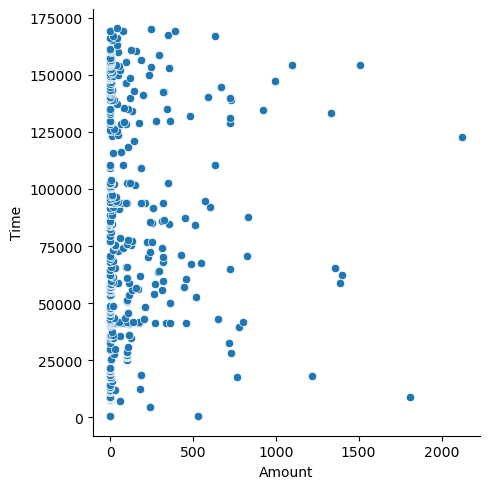

In [13]:
#Visualisation of fraud data
sns.relplot(x='Amount', y='Time',data=fraud)

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


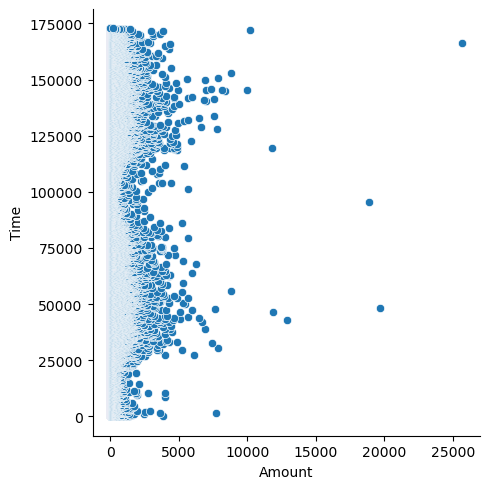

In [14]:
#Visualisation of valid data
sns.relplot(x='Amount', y='Time',data=valid)


In [15]:
#Comparing both the values
creditcard_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [16]:
#Undersampling
#Balancing the data since the data is highly unbalanced
valid_sample=valid.sample(n=492)

In [17]:
#Concatenating two dataframes
new_dataset=pd.concat([valid_sample,fraud],axis=0)



In [18]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
368,269.0,1.320626,-1.174338,0.713431,-2.177941,-1.511234,0.059314,-1.308064,0.298796,0.788814,...,-0.354221,-0.365280,0.064822,-0.322003,0.152701,-0.003131,0.075103,0.010941,2.60,0
105759,69672.0,-1.712900,1.574218,1.572567,-1.717933,-0.216571,-0.881472,0.903504,-0.299501,1.096676,...,-0.328765,-0.061128,-0.103872,0.544874,-0.230138,0.600531,-0.001670,-0.488305,0.75,0
118610,75146.0,-0.626135,1.320521,1.398914,-0.360165,0.800060,-0.587653,1.530287,-0.929484,0.691242,...,-0.590700,-0.688666,-0.210534,-0.194222,-0.012735,0.002920,-0.090682,-0.597665,9.84,0
185091,126512.0,0.295202,0.904137,-1.469443,-0.768849,1.770205,-0.730450,1.600235,-0.327586,-0.982109,...,0.431729,1.321317,-0.340690,0.299532,-0.466102,0.870892,0.126369,0.211787,2.00,0
210531,138022.0,1.898274,-0.062760,-2.058158,0.293770,1.257901,1.287771,-0.298001,0.405569,0.498009,...,0.077040,0.614438,0.098341,-0.785466,-0.078813,0.707831,0.007303,-0.048438,1.00,0


In [19]:
new_dataset['Class'].value_counts()


Class
0    492
1    492
Name: count, dtype: int64

In [20]:
creditcard_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [21]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,98371.241870,0.051056,-0.030281,0.024797,-0.105013,-0.039084,-0.051995,-0.002795,0.009712,-0.030713,...,0.074430,0.033735,0.006324,-0.043851,0.005194,0.022019,-0.022537,0.009979,0.009838,96.777154
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [22]:
#Splitting the data into features and targets
X=new_dataset.drop(columns='Class',axis=1)
Y=new_dataset['Class']

In [23]:
print(X)


            Time        V1        V2        V3        V4        V5        V6  \
368        269.0  1.320626 -1.174338  0.713431 -2.177941 -1.511234  0.059314   
105759   69672.0 -1.712900  1.574218  1.572567 -1.717933 -0.216571 -0.881472   
118610   75146.0 -0.626135  1.320521  1.398914 -0.360165  0.800060 -0.587653   
185091  126512.0  0.295202  0.904137 -1.469443 -0.768849  1.770205 -0.730450   
210531  138022.0  1.898274 -0.062760 -2.058158  0.293770  1.257901  1.287771   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [24]:
print(Y)

368       0
105759    0
118610    0
185091    0
210531    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [25]:
#splitting the data into Training data and Testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,stratify=Y,random_state=2)

In [26]:
print(X.shape,X_train.shape,X_test.shape,Y.shape,Y_train.shape,Y_test.shape)


(984, 30) (738, 30) (246, 30) (984,) (738,) (246,)


In [27]:
#Model Training
#Logistic Regression
model=LogisticRegression()

In [28]:
#Training the Logistic Regression model with training data
model.fit(X_train,Y_train)

LogisticRegression()

In [29]:
#Model Evaluation
#accuracy score
#accuracy on training data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)


In [30]:
print('Accuracy score of Training data: ',training_data_accuracy)

Accuracy score of Training data:  0.9200542005420054


In [31]:
#accuracy on Test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [32]:
print('Accuracy score of Test data: ',test_data_accuracy)

Accuracy score of Test data:  0.8983739837398373
